In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

## Visualizations

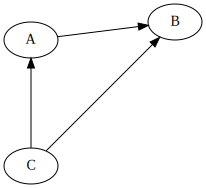

In [3]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'CA']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_01')

graph

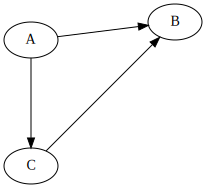

In [4]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,2.75!', '2,3!', '0,1!']

edges = ['AB', 'CB', 'AC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_markov_02')

graph

## Causal graphs and independence

In [5]:
NOISE_LEVEL = .2
N_SAMPLES = 1000

### A chain: `A -> B -> C`

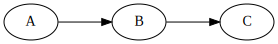

In [6]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_chain_00')

graph

In [7]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
b = a + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

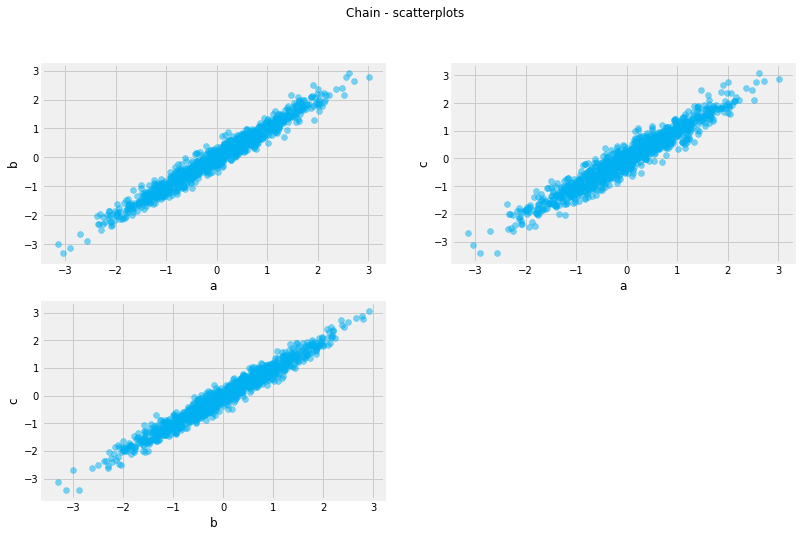

In [8]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Chain - scatterplots')
plt.show()

In [9]:
a.shape

(1000,)

In [10]:
np.vstack([a, b]).T

array([[ 1.16056583e+00,  1.24703317e+00],
       [ 1.15482875e+00,  1.01773505e+00],
       [ 1.07551377e+00,  1.11585754e+00],
       ...,
       [-7.52319976e-01, -9.27891859e-01],
       [-8.54345057e-04, -3.53434191e-01],
       [ 1.36547647e-01,  2.46829727e-01]])

In [12]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:49:28   Log-Likelihood:                 166.50
No. Observations:                1000   AIC:                            -327.0
Df Residuals:                     997   BIC:                            -312.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0036      0.006     -0.557      0.5

### A fork: `A <- B -> C`

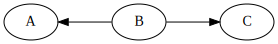

In [13]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['BA', 'BC']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_fork_00')

graph

In [14]:
# Generate the data
b = np.random.randn(N_SAMPLES) 
a = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 
c = b + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

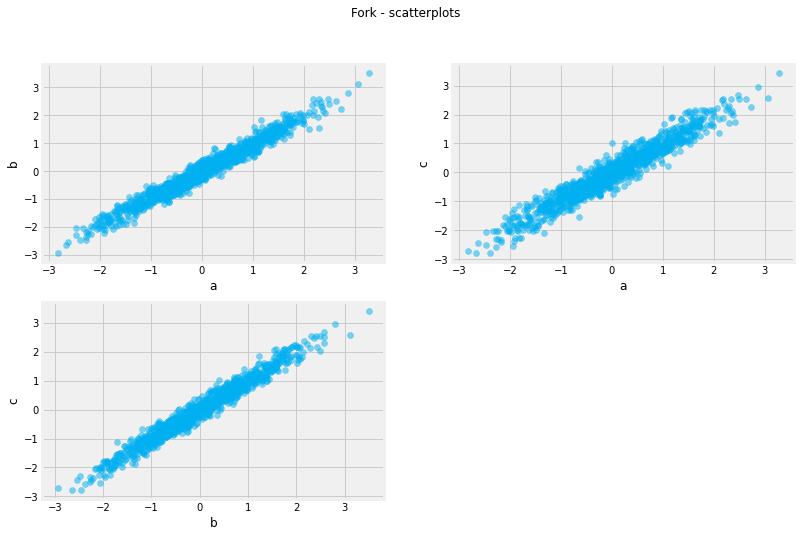

In [15]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Fork - scatterplots')
plt.show()

In [17]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.328e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:50:18   Log-Likelihood:                 205.85
No. Observations:                1000   AIC:                            -405.7
Df Residuals:                     997   BIC:                            -391.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0021      0.006     -0.339      0.7

### A collider: `A -> B <- C`

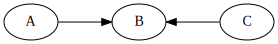

In [18]:
graph = graphviz.Digraph(format='png', engine='neato')

nodes = ['A', 'B', 'C']
positions = ['0,0!', '1.5,0!', '3,0!']

edges = ['AB', 'CB']

[graph.node(n, pos=pos) for n, pos in zip(nodes, positions)]
graph.edges(edges)

graph.render(f'img/ch_05_collider_00')

graph

In [19]:
# Generate the data
a = np.random.randn(N_SAMPLES) 
c = np.random.randn(N_SAMPLES) 
b = a + c + NOISE_LEVEL*np.random.randn(N_SAMPLES) 

# Get combinations
combs = list(combinations([('a', a), ('b', b), ('c', c)], 2))

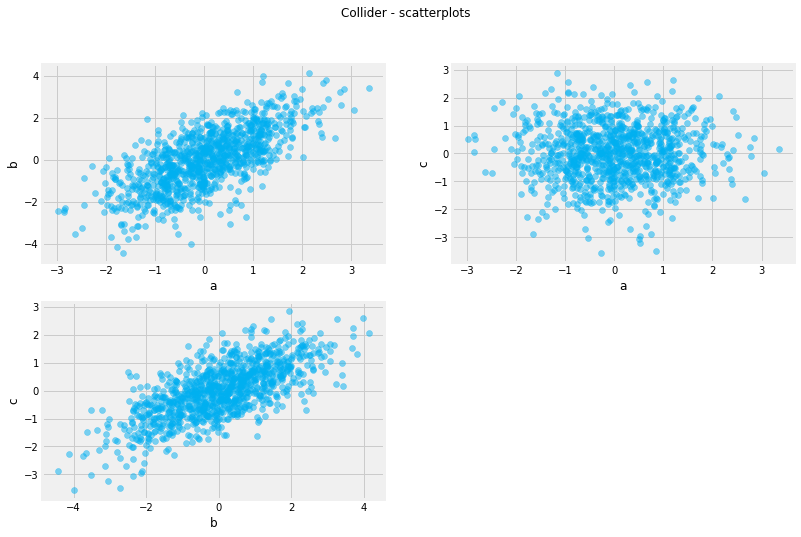

In [20]:
# Plot
plt.figure(figsize=(12, 8))

for i, comb in enumerate(combs):
    key_1, key_2 = comb[0][0], comb[1][0]
    
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(comb[0][1], comb[1][1], alpha=.5, color=COLORS[0])
    plt.xlabel(key_1)
    plt.ylabel(key_2)

plt.suptitle('Collider - scatterplots')
plt.show()

In [22]:
X = pd.DataFrame(np.vstack([a, b]).T, columns=['A', 'B'])
X = sm.add_constant(X, prepend=True)

model = sm.OLS(c, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.158e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:50:48   Log-Likelihood:                 183.96
No. Observations:                1000   AIC:                            -361.9
Df Residuals:                     997   BIC:                            -347.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.006     -1.181      0.2